In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report                   
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#NN
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [195]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [196]:
#EDA
print(data.shape)

(569, 33)


In [197]:
#'id'와 'Unnamed: 32'는 필요없으니 drop 하고 target은 diagnosis입니다.
#진단 결과는 M = maliganant(양성), B = benign(음성) 입니다.
data = data.drop(['id','Unnamed: 32'],axis = 1,errors = 'ignore')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [198]:
target = data["diagnosis"]
target.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [199]:
#preprocessing : label encoding
encoder = LabelEncoder()
data["diagnosis"] = encoder.fit_transform(data["diagnosis"])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<function matplotlib.pyplot.show(close=None, block=None)>

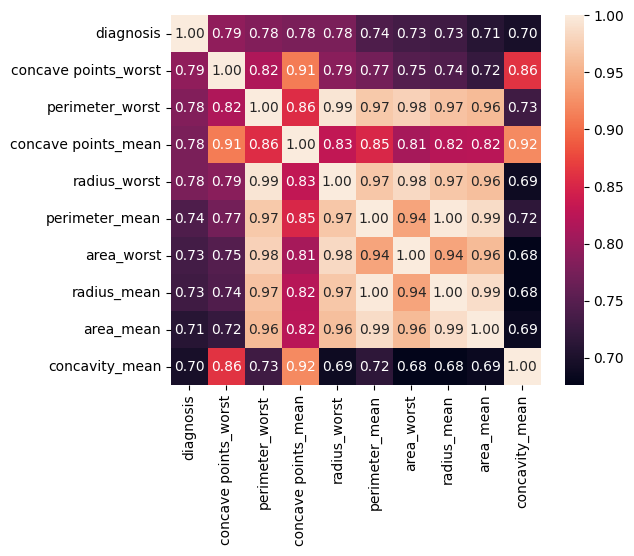

In [200]:
#feature selection using heatmap image
corr = data.corr()
#변수가 31개라 너무 많다. 10개로 줄여야한다.
corr_ten = corr.nlargest(10,'diagnosis')['diagnosis']
index = corr_ten.index
corr_mat = np.corrcoef(data[index].values.T)
heatmap = sns.heatmap(corr_mat, cbar=True, annot=True, square=True, fmt='.2f'
                      ,yticklabels = index.values,xticklabels = index.values )
plt.show

In [201]:
corr_ten

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64

In [202]:
#preprocessing 2 : Nan value
data[index].isna().sum()

diagnosis               0
concave points_worst    0
perimeter_worst         0
concave points_mean     0
radius_worst            0
perimeter_mean          0
area_worst              0
radius_mean             0
area_mean               0
concavity_mean          0
dtype: int64

In [203]:
#train
#case 1 : Support Vector Machine
X = data[index[1:10]]
y = data[index[0]]
#Normalization
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

svm = LinearSVC(C=3,loss='hinge')
#model train
svm.fit(X_train,y_train)
#model test
pred = svm.predict(X_test)
print("C는 3이고 정확도는 :", accuracy_score(pred, y_test).round(3),"입니다.")

C는 3이고 정확도는 : 0.982 입니다.


/Users/bangbyeonghun/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [204]:
#case 2 : Decision Tree
X = data[index[1:10]]
y = data[index[0]]
#Normalization
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [205]:
#model 생성
tree_e = DecisionTreeClassifier(criterion="entropy", max_depth = 4, min_samples_leaf = 3)
#model train
tree_e.fit(X_train, y_train)
#model test
print ("Accuracy: ", accuracy_score(y_test,tree_e.predict(X_test)).round(3)*100)  
print ("Report: \n",  classification_report(y_test, tree_e.predict(X_test)))

Accuracy:  91.2
Report: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        70
           1       0.90      0.86      0.88        44

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



[Text(0.453125, 0.9, 'x[1] <= -0.119\nentropy = 0.95\nsamples = 455\nvalue = [287, 168]'),
 Text(0.1875, 0.7, 'x[0] <= 1.007\nentropy = 0.176\nsamples = 266\nvalue = [259, 7]'),
 Text(0.125, 0.5, 'x[5] <= -0.576\nentropy = 0.114\nsamples = 263\nvalue = [259, 4]'),
 Text(0.0625, 0.3, 'entropy = 0.0\nsamples = 155\nvalue = [155, 0]'),
 Text(0.1875, 0.3, 'x[6] <= -0.614\nentropy = 0.229\nsamples = 108\nvalue = [104, 4]'),
 Text(0.125, 0.1, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.25, 0.1, 'entropy = 0.187\nsamples = 105\nvalue = [102, 3]'),
 Text(0.25, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.71875, 0.7, 'x[0] <= 0.55\nentropy = 0.605\nsamples = 189\nvalue = [28, 161]'),
 Text(0.5625, 0.5, 'x[5] <= 0.135\nentropy = 0.993\nsamples = 60\nvalue = [27, 33]'),
 Text(0.4375, 0.3, 'x[7] <= -0.127\nentropy = 0.845\nsamples = 33\nvalue = [24, 9]'),
 Text(0.375, 0.1, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5, 0.1, 'entropy = 0.592\nsamples = 28\nval

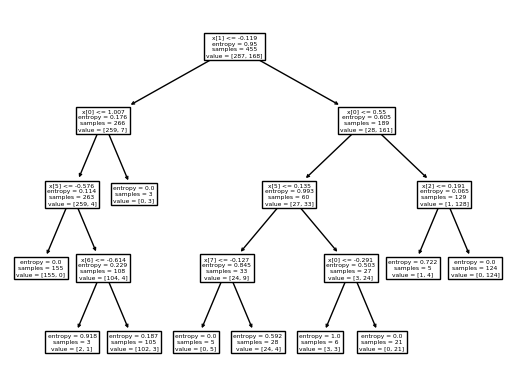

In [206]:
tree.plot_tree(tree_e)

In [207]:
#case 3 : Nueral Network
X = data[index[1:10]]
y = data[index[0]]
#Normalization
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [208]:
#model 생성
model = Sequential()#순차 모델
model.add(Dense(60,activation = 'relu',input_shape = (9,)))#첫번째 은닉층과 입력층
model.add(Dense(60,activation = 'relu'))#두번째 은닉층, 뉴런 60개
model.add(Dense(30,activation = 'relu'))#세번째 은닉층, 뉴런 30개
model.add(Dense(1))#출력층
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 60)                600       
                                                                 
 dense_9 (Dense)             (None, 60)                3660      
                                                                 
 dense_10 (Dense)            (None, 30)                1830      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6121 (23.91 KB)
Trainable params: 6121 (23.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [209]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 200, batch_size = 32)

Epoch 1/200
15/15 [==============================] - 0s 539us/step - loss: 0.3084 - accuracy: 0.6681
Epoch 2/200
15/15 [==============================] - 0s 614us/step - loss: 0.1113 - accuracy: 0.8791
Epoch 3/200
15/15 [==============================] - 0s 514us/step - loss: 0.0871 - accuracy: 0.9055
Epoch 4/200
15/15 [==============================] - 0s 502us/step - loss: 0.0671 - accuracy: 0.9341
Epoch 5/200
15/15 [==============================] - 0s 489us/step - loss: 0.0558 - accuracy: 0.9495
Epoch 6/200
15/15 [==============================] - 0s 524us/step - loss: 0.0478 - accuracy: 0.9582
Epoch 7/200
15/15 [==============================] - 0s 531us/step - loss: 0.0450 - accuracy: 0.9538
Epoch 8/200
15/15 [==============================] - 0s 572us/step - loss: 0.0401 - accuracy: 0.9582
Epoch 9/200
15/15 [==============================] - 0s 560us/step - loss: 0.0367 - accuracy: 0.9648
Epoch 10/200
15/15 [==============================] - 0s 548us/step - loss: 0.0342 - accura

15/15 [==============================] - 0s 493us/step - loss: 0.0045 - accuracy: 0.9956
Epoch 161/200
15/15 [==============================] - 0s 521us/step - loss: 0.0043 - accuracy: 0.9956
Epoch 162/200
15/15 [==============================] - 0s 504us/step - loss: 0.0039 - accuracy: 0.9956
Epoch 163/200
15/15 [==============================] - 0s 516us/step - loss: 0.0054 - accuracy: 0.9956
Epoch 164/200
15/15 [==============================] - 0s 498us/step - loss: 0.0048 - accuracy: 0.9956
Epoch 165/200
15/15 [==============================] - 0s 521us/step - loss: 0.0042 - accuracy: 0.9956
Epoch 166/200
15/15 [==============================] - 0s 488us/step - loss: 0.0041 - accuracy: 0.9956
Epoch 167/200
15/15 [==============================] - 0s 522us/step - loss: 0.0041 - accuracy: 0.9956
Epoch 168/200
15/15 [==============================] - 0s 494us/step - loss: 0.0039 - accuracy: 0.9956
Epoch 169/200
15/15 [==============================] - 0s 501us/step - loss: 0.0041 - a

In [215]:
test_loss, test_acc = model.evaluate(X_test,y_test,verbose = 2)
print("accuracy:",test_acc)

4/4 - 0s - loss: 0.0279 - accuracy: 0.9825 - 19ms/epoch - 5ms/step
accuracy: 0.9824561476707458
